In [65]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
car_df = pd.read_csv('car_sales_data.csv')
car_df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [67]:
car_df.tail()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630
49999,VW,Golf,1.4,Diesel,2012,109300,10400


In [68]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [69]:
car_price = car_df['Price']

In [70]:
print (car_price.count ())
print (car_price.mean ())
print (car_price.median ())
print (car_price.mode ())
print (car_price.std ())
print (car_price.quantile (.50))
print (car_price.quantile (.75))

50000
13828.90316
7971.5
0    1610
Name: Price, dtype: int64
16416.6813364134
7971.5
19026.5


###### Getting the price based on different variables (features in the dataset)

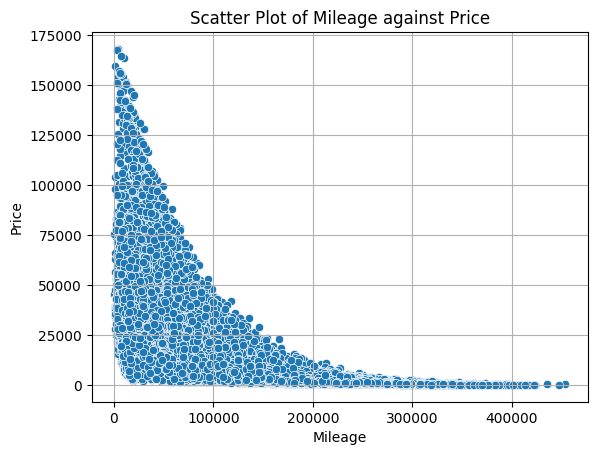

In [71]:
fig1, ax1 = plt.subplots()
sns.scatterplot (car_df, x = 'Mileage', y = 'Price')
ax1.set_title('Scatter Plot of Mileage against Price')
ax1.grid(True)

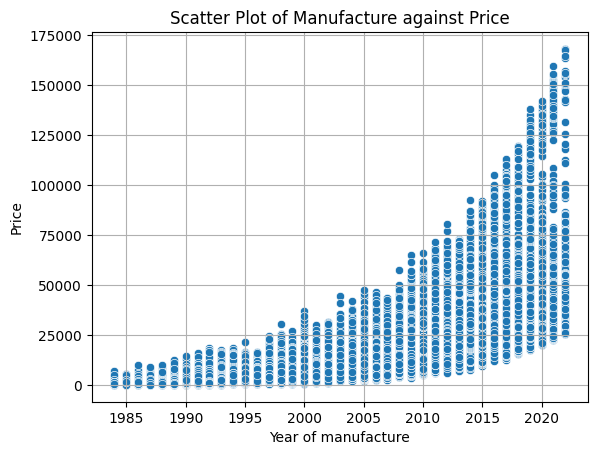

In [72]:
fig2, ax2 = plt.subplots()
sns.scatterplot (car_df, x = 'Year of manufacture', y = 'Price')
ax2.set_title('Scatter Plot of Manufacture against Price')
ax2.grid(True)

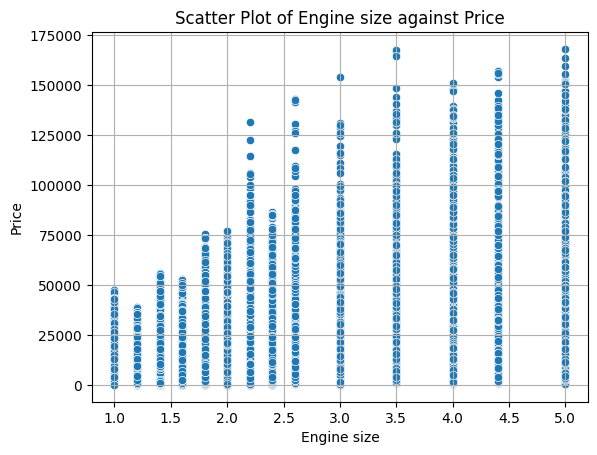

In [73]:
fig3, ax3 = plt.subplots()
sns.scatterplot (car_df, x = 'Engine size', y = 'Price')
ax3.set_title('Scatter Plot of Engine size against Price')
ax3.grid(True)

### Compare regression models that predict the price of a car based on a single numerical input feature. Using both linear model or by a non-linear (e.g. polynomial) model

##### Simple Linear regression Model

In [74]:
x = car_df ['Year of manufacture']
y = car_df ['Price']

In [75]:
x.shape

(50000,)

In [76]:
#reshaping the data so it has rows and columns
x = x.to_numpy().reshape(-1, 1)
x.shape

(50000, 1)

In [77]:
from sklearn.model_selection import train_test_split

# To set a testing and training model using 0.2 i.e 20% test for 80% for training 
#using the x as feature to train/test the y which is the target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

###### Applying standardization and scaling

In [78]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class:
scale = StandardScaler()

scale.fit(x_train) #to fit the instance to x_train to avoid data leakage

x_train_scaled = scale.transform(x_train) #scale the training set
x_test_scaled = scale.transform(x_test) #scale the testing set

#The mean and std
print (f'the mean and STD are: {scale.mean_} and {scale.scale_} respectively')

the mean and STD are: [2004.23325] and [9.64271199] respectively


###### To create a linear regression model to fit the training data

In [79]:
#import the LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

In [80]:
# creating an instance of this model and fitting it to the training data like so
car_linear = LinearRegression()
car_linear.fit(x_train_scaled, y_train)

#Getting the gradient and intercept
gradient = car_linear.coef_[0]
intercept = car_linear.intercept_
print("gradient: ", gradient)
print("intercept: ", intercept)

gradient:  11711.62203633313
intercept:  13854.628699999997


In [81]:
# calculating the predicted outputs (price) from the test dataset using the model.

price_pred = car_linear.predict(x_test_scaled)

#calculating the metrics Mean absolute error (MAE), Mean squared error (MSE). Root mean squared error (RMSE), 
# Coefficient of determination (R2). using sklearn:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, price_pred)
mse = mean_squared_error(y_test, price_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, price_pred)
print (f'mae : {mae:2f}')
print (f'rmse : {rmse:2f}')
print (f'r2 : {r2:2f}')

mae : 7031.039209
rmse : 11518.637070
r2 : 0.511087


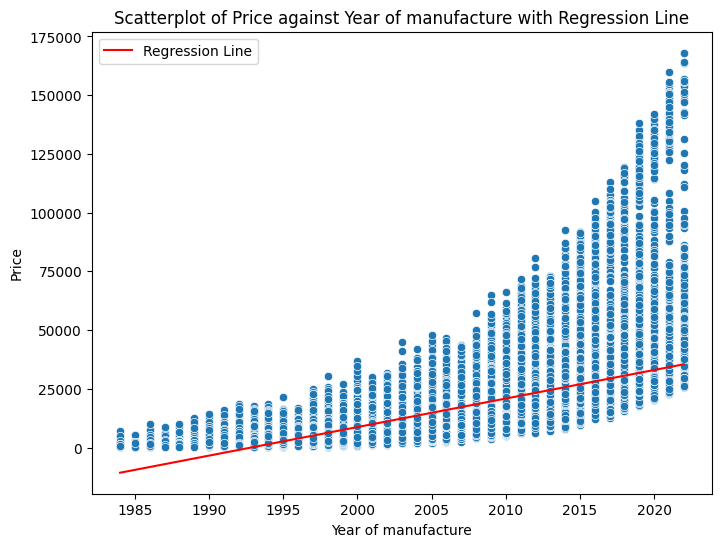

In [82]:
# Plotting scatterplot and regression line
x_fit = np.linspace(min(x), max(x), num=100).reshape(-1, 1)
x_fit_scaled = scale.transform(x_fit)
y_fit = car_linear.predict(x_fit_scaled)

fig4, ax4 = plt.subplots(figsize=(8, 6))  #figsize for creating the figure
sns.scatterplot(data=car_df, x="Year of manufacture", y="Price", ax=ax4)
ax4.plot(x_fit, y_fit, color='red', label='Regression Line')  #adding the regression line
ax4.set_title("Scatterplot of Price against Year of manufacture with Regression Line")
ax4.legend()
plt.show()

In [83]:
x = car_df ['Engine size'].astype(float)
y = car_df ['Price']


x = x.to_numpy().reshape(-1, 1)
x.shape
#set a testing and training model using 0.2 i.e 20% test for 80% for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class:
scale = StandardScaler()

#to fit the instance to x_train to avoid data leakage
scale.fit(x_train) 

#The mean and std
print (f'the mean and STD are: {scale.mean_} and {scale.scale_} respectively')
x_train_scaled = scale.transform(x_train) #scale the training set
x_test_scaled = scale.transform(x_test) #scale the testing set

#creating an instance and fiting the instance
car_linear = LinearRegression()
car_linear.fit(x_train_scaled, y_train)

#Getting the gradient and intercept
gradient = car_linear.coef_[0]
intercept = car_linear.intercept_
print("gradient: ", gradient)
print("intercept: ", intercept)

#calculating the metrics Mean absolute error (MAE), Mean squared error (MSE). Root mean squared error (RMSE), 
# Coefficient of determination (R2). using sklearn:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, price_pred)
mse = mean_squared_error(y_test, price_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, price_pred)
print (f'mae : {mae:2f}')
print (f'rmse : {rmse:2f}')
print (f'r2 : {r2:2f}')

the mean and STD are: [1.773225] and [0.73824901] respectively
gradient:  6575.659995991372
intercept:  13854.6287
mae : 7031.039209
rmse : 11518.637070
r2 : 0.511087


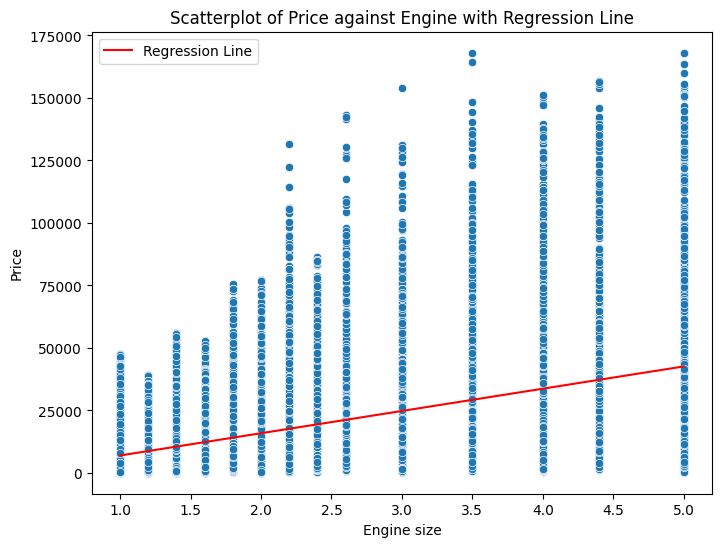

In [84]:
# Plotting scatterplot and regression line
x_fit = np.linspace(min(x), max(x), num=100).reshape(-1, 1)
x_fit_scaled = scale.transform(x_fit)
y_fit = car_linear.predict(x_fit_scaled)

fig5, ax5 = plt.subplots(figsize=(8, 6))  #figsize for creating the figure
sns.scatterplot(data=car_df, x="Engine size", y="Price", ax=ax5)
ax5.plot(x_fit, y_fit, color='red', label='Regression Line')  #adding the regression line
ax5.set_title("Scatterplot of Price against Engine with Regression Line")
ax5.legend()
plt.show()

###### Using another variable 'Mileage' to test and train the model

In [85]:
x = car_df [['Mileage']] #reshaping the data so it has rows and columns using []
y = car_df ['Price']


#set a testing and training model using 0.2 i.e 20% test for 80% for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create an instance of the StandardScaler class:
scale = StandardScaler()

#to fit the instance to x_train to avoid data leakage
scale.fit(x_train) 

#The mean and std
print (f'the mean and STD are: {scale.mean_} and {scale.scale_} respectively')
x_train_scaled = scale.transform(x_train) #scale the training set
x_test_scaled = scale.transform(x_test) #scale the testing set

#creating an instance and fiting the instance
car_linear = LinearRegression()
car_linear.fit(x_train_scaled, y_train)

#Getting the gradient and intercept
gradient = car_linear.coef_[0]
intercept = car_linear.intercept_
print("gradient: ", gradient)
print("intercept: ", intercept)

#calculating the metrics Mean absolute error (MAE), Mean squared error (MSE). Root mean squared error (RMSE), 
# Coefficient of determination (R2). using sklearn:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, price_pred)
mse = mean_squared_error(y_test, price_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, price_pred)
print (f'mae : {mae:2f}')
print (f'rmse : {rmse:2f}')
print (f'r2 : {r2:2f}')

the mean and STD are: [112217.77365] and [71564.3626029] respectively
gradient:  -10374.075445707327
intercept:  13854.6287
mae : 7031.039209
rmse : 11518.637070
r2 : 0.511087


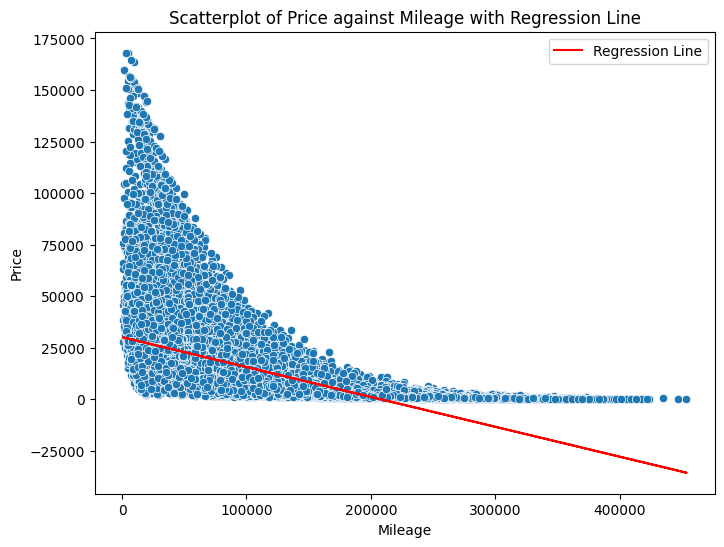

In [86]:
x_fit = car_df [['Mileage']]
x_fit_scaled = scale.transform(x_fit)
y_fit = car_linear.predict(x_fit_scaled)


fig6, ax6 = plt.subplots(figsize=(8, 6))  #figsize for creating the figure
sns.scatterplot(data=car_df, x = "Mileage", y = "Price", ax=ax6)
ax6.plot(x_fit, y_fit, color='red', label='Regression Line')  #adding the regression line
ax6.set_title("Scatterplot of Price against Mileage with Regression Line")
ax6.legend()
plt.show()

###### Using a polynomial regression

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


x = car_df["Mileage"]
y = car_df["Price"]
x = x.to_numpy().reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

poly = PolynomialFeatures(degree=5, include_bias=False)
x_poly_train = poly.fit_transform(x_train_scaled)
x_poly_test = poly.transform(x_test_scaled)

car_poly = LinearRegression()
car_poly.fit(x_poly_train, y_train)
car_pred = car_poly.predict(x_poly_test)

mae = mean_absolute_error(y_test, car_pred)
rmse = mean_squared_error(y_test, car_pred, squared=False)
r2 = r2_score(y_test, car_pred)

print('MAE:', mae)
print('RMSE:', rmse)
print('R2:', r2)

MAE: 5698.012248246017
RMSE: 10983.032243536303
R2: 0.5554973696201464


In [88]:
# Access the coefficients for each term in the polynomial equation
coefficients = car_poly.coef_

# Access the standard deviation (STD) of the residuals
std_residuals = np.std(y_test - car_pred)

# Access the gradient coefficient (slope) of the regression line
gradient_coefficient = car_poly.coef_[0]

print('Coefficients:', coefficients)
print('Standard Deviation of Residuals:', std_residuals)
print('Gradient Coefficient (Slope):',gradient_coefficient)

Coefficients: [-9320.48516982  6261.15253565 -2660.14013749   606.02969687
   -54.02125802]
Standard Deviation of Residuals: 10982.657345246058
Gradient Coefficient (Slope): -9320.485169816186


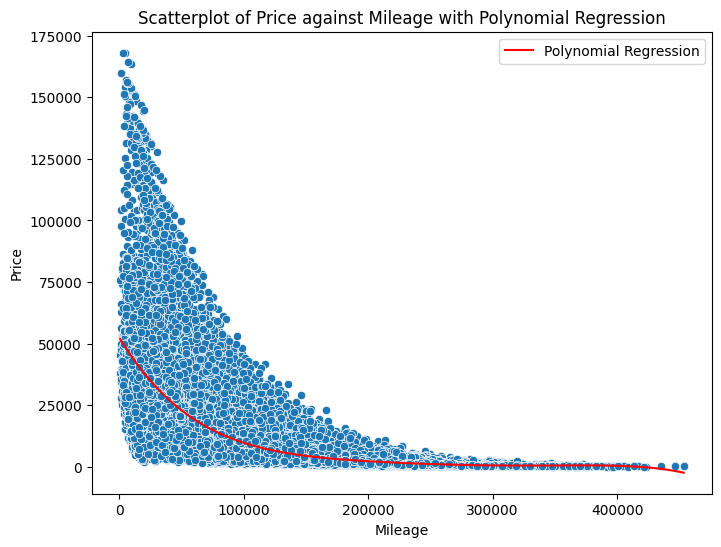

In [89]:
# Generate x values for plotting the curve
x_values = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_values_scaled = scale.transform(x_values)
x_values_poly = poly.transform(x_values_scaled)
y_values_pred = car_poly.predict(x_values_poly)


# Plotting the curve
fig7, ax7 = plt.subplots(figsize=(8, 6))  #figsize for creating the figure
sns.scatterplot(data=car_df, x = "Mileage", y = "Price", ax=ax7)
ax7.plot(x_values, y_values_pred, color='red', label='Polynomial Regression')  #adding the regression line
ax7.set_title("Scatterplot of Price against Mileage with Polynomial Regression")
ax7.legend()
plt.show()

###### Year of manufacture

In [90]:
x = car_df["Year of manufacture"]
y = car_df["Price"]
x = x.to_numpy().reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

poly = PolynomialFeatures(degree=5, include_bias=False)
x_poly_train = poly.fit_transform(x_train_scaled)
x_poly_test = poly.transform(x_test_scaled)

car_poly = LinearRegression()
car_poly.fit(x_poly_train, y_train)
car_pred = car_poly.predict(x_poly_test)

mae = mean_absolute_error(y_test, car_pred)
rmse = mean_squared_error(y_test, car_pred, squared=False)
r2 = r2_score(y_test, car_pred)

print('MAE:', mae)
print('RMSE:', rmse)
print('R2:', r2)

MAE: 5160.772689003987
RMSE: 10131.864165360032
R2: 0.6217242199290662


In [91]:
# Access the coefficients for each term in the polynomial equation
coefficients = car_poly.coef_

# Access the standard deviation (STD) of the residuals
std_residuals = np.std(y_test - car_pred)

# Calculate the gradient coefficient (slope) of the regression line
# Here, the gradient will be for the linear component of the polynomial (first-degree term)
gradient_coefficient = car_poly.coef_[1]

print('Coefficients:', coefficients)
print('Standard Deviation of Residuals:', std_residuals)
print('Gradient Coefficient (Slope):', gradient_coefficient)

Coefficients: [9192.37268564 4355.66124509 1234.26959138  448.11513132  130.94503097]
Standard Deviation of Residuals: 10131.850203490567
Gradient Coefficient (Slope): 4355.661245085044


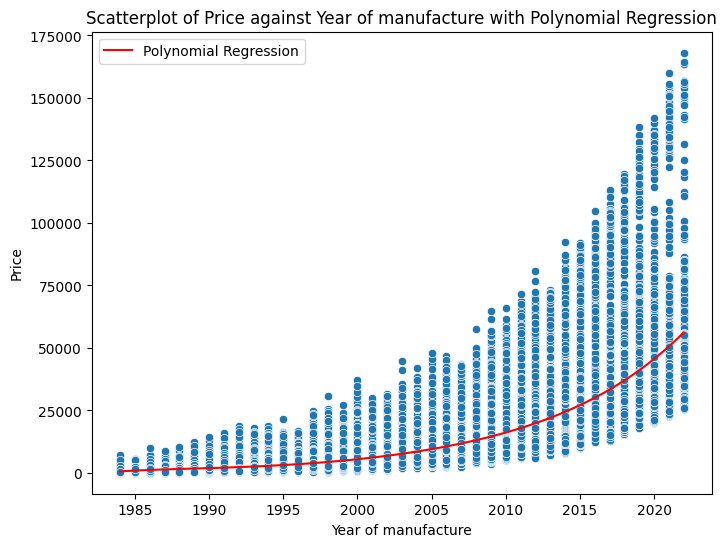

In [92]:
# Generate x values for plotting the curve
x_values = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_values_scaled = scale.transform(x_values)
x_values_poly = poly.transform(x_values_scaled)
y_values_pred = car_poly.predict(x_values_poly)

# Plotting the curve
fig8, ax8 = plt.subplots(figsize=(8, 6))  #figsize for creating the figure
sns.scatterplot(data=car_df, x="Year of manufacture", y="Price", ax=ax8)
ax8.plot(x_values, y_values_pred, color='red', label='Polynomial Regression')  #adding the regression line
ax8.set_title("Scatterplot of Price against Year of manufacture with Polynomial Regression")
ax8.legend()
plt.show()

###### Engine size

In [93]:
x = car_df["Engine size"]
y = car_df["Price"]
x = x.to_numpy().reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

poly = PolynomialFeatures(degree=5, include_bias=False)
x_poly_train = poly.fit_transform(x_train_scaled)
x_poly_test = poly.transform(x_test_scaled)

car_poly = LinearRegression()
car_poly.fit(x_poly_train, y_train)
car_pred = car_poly.predict(x_poly_test)

mae = mean_absolute_error(y_test, car_pred)
rmse = mean_squared_error(y_test, car_pred, squared=False)
r2 = r2_score(y_test, car_pred)

print('MAE:', mae)
print('RMSE:', rmse)
print('R2:', r2)

MAE: 10801.138446122193
RMSE: 15165.799038580913
R2: 0.15245959450166247


In [94]:
# Access the coefficients for each term in the polynomial equation
coefficients = car_poly.coef_

# Access the standard deviation (STD) of the residuals
std_residuals = np.std(y_test - car_pred)

# Calculate the gradient coefficient (slope) of the regression line
# Here, the gradient will be for the linear component of the polynomial (first-degree term)
gradient_coefficient = car_poly.coef_[1]

print('Coefficients:', coefficients)
print('Standard Deviation of Residuals:', std_residuals)
print('Gradient Coefficient (Slope):', gradient_coefficient)

Coefficients: [ 6.90235230e+03  1.31454103e+03 -7.32130204e+02  1.18982973e+02
 -4.78043874e+00]
Standard Deviation of Residuals: 15165.4153632985
Gradient Coefficient (Slope): 1314.5410255363834


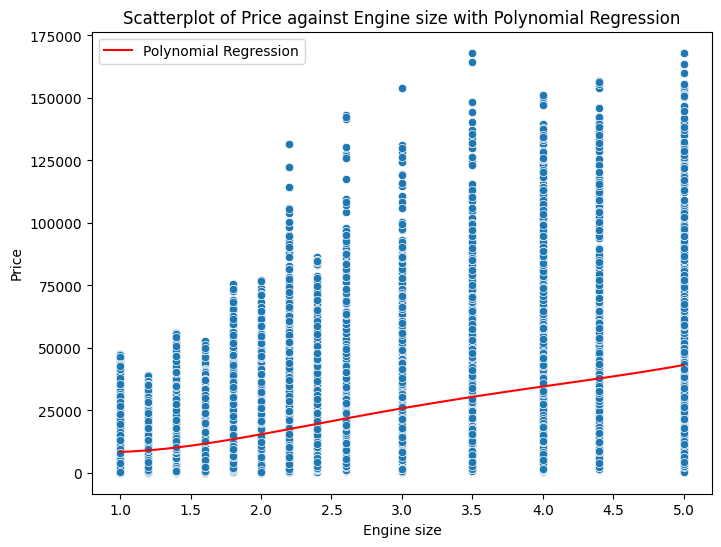

In [95]:
# Generate x values for plotting the curve
x_values = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_values_scaled = scale.transform(x_values)
x_values_poly = poly.transform(x_values_scaled)
y_values_pred = car_poly.predict(x_values_poly)

# Plotting the curve
fig9, ax9 = plt.subplots(figsize=(8, 6))  #figsize for creating the figure
sns.scatterplot(data=car_df, x="Engine size", y="Price", ax=ax9)
ax9.plot(x_values, y_values_pred, color='red', label='Polynomial Regression')  #adding the regression line
ax9.set_title("Scatterplot of Price against Engine size with Polynomial Regression")
ax9.legend()
plt.show()

#### B. Multiple Linear Regression Model
Consider regression models that take multiple numerical variables as input features
to predict the price of a car.

In [32]:
feature_names = ["Year of manufacture", "Mileage", "Engine size"]
x = car_df[feature_names]

In [33]:
#using 30% for training and 70% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

scale = StandardScaler() #create an instance of the standardscaler class:
scale.fit(x_train) #fit the instance to the x_train to avoid leakage
print (f'mean and standard deviationa are: {scale.mean_} and {scale.scale_} respectively')

# use this to transform the train and test datasets accordingly
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

mean and standard deviationa are: [2.00422434e+03 1.12200096e+05 1.77490286e+00] and [9.65412785e+00 7.16118070e+04 7.42168149e-01] respectively


In [34]:
car_linear = LinearRegression()
car_linear.fit(x_train_scaled, y_train)

#Printing the gradient and intercept
gradient = car_linear.coef_[:]
intercept = car_linear.intercept_
print("gradient: ", gradient)
print("intercept: ", intercept)

gradient:  [ 9543.7564488  -2711.2146394   6604.89795079]
intercept:  13861.157771428516


MAE: 6047.64
RMSE: 9376.17
R2: 0.67


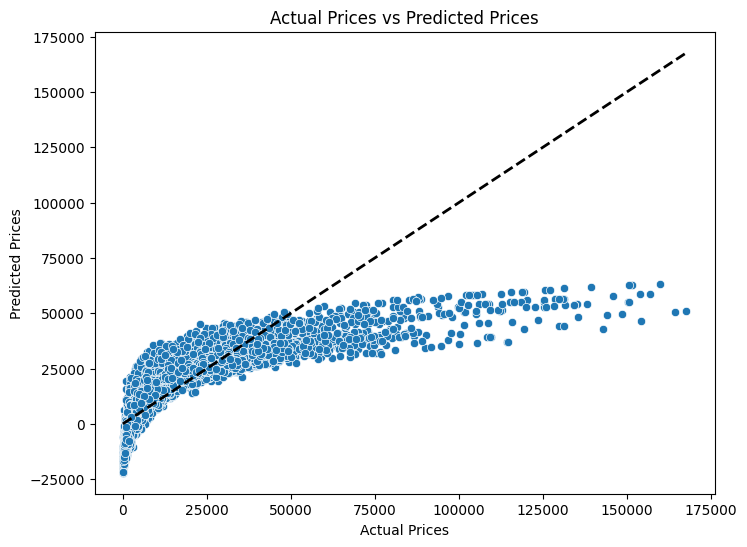

In [35]:
# Predicting prices on the test set
car_pred = car_linear.predict(x_test_scaled)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, car_pred)
rmse = mean_squared_error(y_test, car_pred, squared=False)
r2 = r2_score(y_test, car_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')

# Plotting the predicted vs actual prices with the line for perfect prediction
fig10, ax10 = plt.subplots(figsize=(8, 6)) 
sns.scatterplot(x=y_test, y=car_pred)
ax10.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect prediction
ax10.set_xlabel('Actual Prices')
ax10.set_ylabel('Predicted Prices')
ax10.set_title('Actual Prices vs Predicted Prices')
plt.show()

#### C. 
In parts (a) and (b) you only considered models that use the numerical variables from
the dataset as inputs. However, there are also several categorical variables in the
dataset that are likely to affect the price of the car. Now train a regression model
that uses all relevant input variables (both categorical and numerical) to predict the
price (e.g. a Random Forest Regressor model). Does this improve the accuracy of
your results?

In [36]:
print (car_df.columns)

Index(['Manufacturer', 'Model', 'Engine size', 'Fuel type',
       'Year of manufacture', 'Mileage', 'Price'],
      dtype='object')


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


# Separate features and target variable
x = car_df.drop('Price', axis=1)  # Features (all columns except 'Price')
y = car_df['Price']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Preprocess categorical variables using One-Hot Encoding
categorical_cols = ['Manufacturer', 'Model', 'Fuel type']
numerical_cols = ['Engine size', 'Year of manufacture', 'Mileage']

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),  # Numerical columns remain unchanged
        ('cat', OneHotEncoder(), categorical_cols)  # One-Hot Encode categorical columns
    ])

# Create a pipeline with preprocessing and Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(x_train, y_train)

# Evaluate the model
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print(f"Training R2 Score: {train_score:.3f}")
print(f"Testing R2 Score: {test_score:.3f}")

Training R2 Score: 1.000
Testing R2 Score: 0.998


In [38]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Define numerical and categorical columns
numerical_cols = ['Engine size', 'Year of manufacture', 'Mileage']
categorical_cols = ['Manufacturer', 'Model', 'Fuel type']

# Preprocessing for numerical features (scaling)
numerical_transformer = StandardScaler()

# Preprocessing for categorical features (one-hot encoding)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with preprocessing and Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(x_train, y_train)

# Predict prices on the test set
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Absolute Error (MAE): 313.66
Mean Squared Error (MSE): 569447.62
R-squared (R2) Score: 1.00


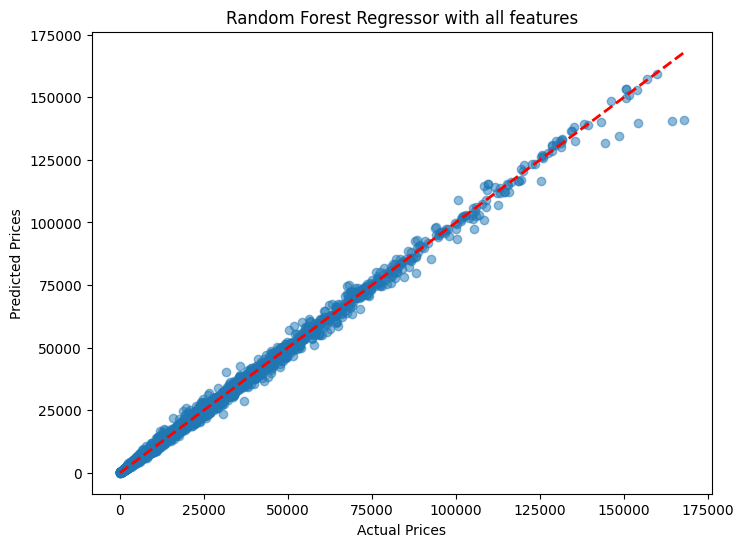

In [39]:
# Plotting predicted prices against actual prices
fig11, ax11 = plt.subplots(figsize=(8, 6)) 
plt.scatter(y_test, y_pred, alpha=0.5)
ax11.set_xlabel("Actual Prices")
ax11.set_ylabel("Predicted Prices")
ax11.set_title("Random Forest Regressor with all features")
ax11.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.show()

#### D. 
Develop an Artificial Neural Network (ANN) model to predict the price of a car based
on all the available information from the dataset. How does its performance
compare to the other supervised learning models that you have considered? Discuss
your choices for the architecture of the neural network that you used, and describe
how you tuned the hyperparameters in your model to achieve the best performance.

###### Using a batch side of 32

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Separate features and target variable
x = car_df.drop('Price', axis=1)
y = car_df['Price']

# Preprocessing: Scale numerical and encode categorical features
numeric_features = ['Engine size', 'Year of manufacture', 'Mileage']
categorical_features = ['Manufacturer', 'Model', 'Fuel type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

x_processed = preprocessor.fit_transform(x)

# Convert SparseMatrix to dense array
x_processed = x_processed.toarray()

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_processed, y, test_size=0.3, random_state=42)

# Creating an ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_processed.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression (no activation function)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
1094/1094 [==============================] - 5s 3ms/step - loss: 220190096.0000 - val_loss: 63696028.0000
Epoch 2/100
1094/1094 [==============================] - 3s 3ms/step - loss: 45432332.0000 - val_loss: 37587184.0000
Epoch 3/100
1094/1094 [==============================] - 4s 3ms/step - loss: 30152108.0000 - val_loss: 25320528.0000
Epoch 4/100
1094/1094 [==============================] - 4s 3ms/step - loss: 18203036.0000 - val_loss: 14846193.0000
Epoch 5/100
1094/1094 [==============================] - 3s 3ms/step - loss: 10961724.0000 - val_loss: 9613058.0000
Epoch 6/100
1094/1094 [==============================] - 3s 3ms/step - loss: 7130883.0000 - val_loss: 6493527.0000
Epoch 7/100
1094/1094 [==============================] - 4s 4ms/step - loss: 4837365.5000 - val_loss: 4508363.0000
Epoch 8/100
1094/1094 [==============================] - 4s 3ms/step - loss: 3373230.0000 - val_loss: 3149667.5000
Epoch 9/100
1094/1094 [==============================] - 3s 3ms/step -

1094/1094 [==============================] - 3s 3ms/step - loss: 71868.1641 - val_loss: 100031.1484
Epoch 74/100
1094/1094 [==============================] - 3s 3ms/step - loss: 72493.7812 - val_loss: 79996.9219
Epoch 75/100
1094/1094 [==============================] - 3s 3ms/step - loss: 71562.8516 - val_loss: 82368.0547
Epoch 76/100
1094/1094 [==============================] - 3s 3ms/step - loss: 69936.6094 - val_loss: 80782.8281
Epoch 77/100
1094/1094 [==============================] - 4s 4ms/step - loss: 68424.7266 - val_loss: 78759.1172
Epoch 78/100
1094/1094 [==============================] - 3s 3ms/step - loss: 69091.7266 - val_loss: 92597.5859
Epoch 79/100
1094/1094 [==============================] - 3s 2ms/step - loss: 67228.1016 - val_loss: 91400.0312
Epoch 80/100
1094/1094 [==============================] - 2s 2ms/step - loss: 66271.9766 - val_loss: 70135.1172
Epoch 81/100
1094/1094 [==============================] - 3s 2ms/step - loss: 64315.4297 - val_loss: 68822.1875
Epoc

In [41]:
# Predict on test set
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

469/469 [==============================] - 1s 1ms/step
Mean Absolute Error (MAE): 138.12
Mean Squared Error (MSE): 54071.85
R-squared (R2) Score: 1.00


In [42]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df

,loss,val_loss
0,2.201901e+08,6.369603e+07
1,4.543233e+07,3.758718e+07
2,3.015211e+07,2.532053e+07
3,1.820304e+07,1.484619e+07
4,1.096172e+07,9.613058e+06
...,...,...
95,4.890549e+04,5.234430e+04
96,4.711628e+04,5.290891e+04
97,4.680306e+04,5.725652e+04
98,4.603268e+04,5.269154e+04


In [43]:
training_loss = history_df['loss']
val_loss = history_df['val_loss']

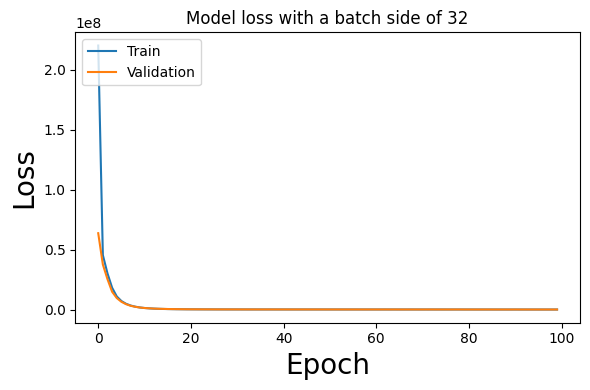

In [44]:
#plot the loss
fig12, ax12 = plt.subplots(figsize =(6,4))
ax12.plot(training_loss)
ax12.plot(val_loss)
ax12.set_xlabel('Epoch', fontsize =20)
ax12.set_ylabel('Loss', fontsize =20)
ax12.set_title('Model Loss')
ax12.legend(['Train', 'Validation'], loc='upper left')
ax12.set_title("Model loss with a batch side of 32")

plt.tight_layout()
plt.show()

###### Using a batch size of 64

In [45]:
# Separate features and target variable
x = car_df.drop('Price', axis=1)
y = car_df['Price']

# Preprocessing: Scale numerical and encode categorical features
numeric_features = ['Engine size', 'Year of manufacture', 'Mileage']
categorical_features = ['Manufacturer', 'Model', 'Fuel type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

x_processed = preprocessor.fit_transform(x)

# Convert SparseMatrix to dense array
x_processed = x_processed.toarray()

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_processed, y, test_size=0.3, random_state=42)

# Creating an ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_processed.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression (no activation function)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
547/547 [==============================] - 4s 4ms/step - loss: 337076608.0000 - val_loss: 127151760.0000
Epoch 2/100
547/547 [==============================] - 2s 4ms/step - loss: 79511408.0000 - val_loss: 58242424.0000
Epoch 3/100
547/547 [==============================] - 2s 4ms/step - loss: 46695468.0000 - val_loss: 41584280.0000
Epoch 4/100
547/547 [==============================] - 2s 3ms/step - loss: 35356348.0000 - val_loss: 33083820.0000
Epoch 5/100
547/547 [==============================] - 2s 3ms/step - loss: 27542558.0000 - val_loss: 24723428.0000
Epoch 6/100
547/547 [==============================] - 2s 3ms/step - loss: 19654582.0000 - val_loss: 17633070.0000
Epoch 7/100
547/547 [==============================] - 2s 4ms/step - loss: 14096501.0000 - val_loss: 13138811.0000
Epoch 8/100
547/547 [==============================] - 2s 3ms/step - loss: 10517898.0000 - val_loss: 10034728.0000
Epoch 9/100
547/547 [==============================] - 2s 3ms/step - loss: 805

547/547 [==============================] - 2s 3ms/step - loss: 152564.2344 - val_loss: 156171.9531
Epoch 74/100
547/547 [==============================] - 2s 3ms/step - loss: 147384.4531 - val_loss: 149672.5469
Epoch 75/100
547/547 [==============================] - 2s 3ms/step - loss: 142894.3906 - val_loss: 147861.1250
Epoch 76/100
547/547 [==============================] - 2s 3ms/step - loss: 137703.5156 - val_loss: 142102.7031
Epoch 77/100
547/547 [==============================] - 2s 3ms/step - loss: 134345.5000 - val_loss: 138175.8438
Epoch 78/100
547/547 [==============================] - 2s 3ms/step - loss: 130398.3359 - val_loss: 133860.9531
Epoch 79/100
547/547 [==============================] - 1s 3ms/step - loss: 125623.1484 - val_loss: 132622.3125
Epoch 80/100
547/547 [==============================] - 2s 3ms/step - loss: 121910.4531 - val_loss: 126284.9453
Epoch 81/100
547/547 [==============================] - 1s 3ms/step - loss: 118674.7266 - val_loss: 121971.8594
Epoch

In [46]:
# Predict on test set
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

469/469 [==============================] - 1s 1ms/step


In [47]:
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Absolute Error (MAE): 150.24
Mean Squared Error (MSE): 73928.59
R-squared (R2) Score: 1.00


In [48]:
# Convert the history to a DataFrame
history_df = pd.DataFrame(history.history)
history_df

,loss,val_loss
0,3.370766e+08,1.271518e+08
1,7.951141e+07,5.824242e+07
2,4.669547e+07,4.158428e+07
3,3.535635e+07,3.308382e+07
4,2.754256e+07,2.472343e+07
...,...,...
95,7.405718e+04,8.192066e+04
96,7.223189e+04,7.624744e+04
97,6.919427e+04,7.486775e+04
98,6.674230e+04,8.022991e+04


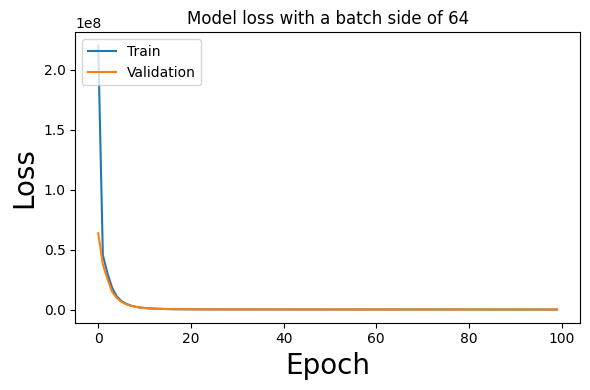

In [49]:
#plot the loss
fig13, ax13 = plt.subplots(figsize =(6,4))
ax13.plot(training_loss)
ax13.plot(val_loss)
ax13.set_xlabel('Epoch', fontsize =20)
ax13.set_ylabel('Loss', fontsize =20)
ax13.set_title('Model Loss')
ax13.legend(['Train', 'Validation'], loc='upper left')
ax13.set_title("Model loss with a batch side of 64")
plt.tight_layout()
plt.show()

##### Using a batch size of 128

In [50]:
# Separate features and target variable
x = car_df.drop('Price', axis=1)
y = car_df['Price']

# Preprocessing: Scale numerical and encode categorical features
numeric_features = ['Engine size', 'Year of manufacture', 'Mileage']
categorical_features = ['Manufacturer', 'Model', 'Fuel type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

x_processed = preprocessor.fit_transform(x)

# Convert SparseMatrix to dense array
x_processed = x_processed.toarray()

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_processed, y, test_size=0.3, random_state=42)

# Creating an ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_processed.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression (no activation function)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history= model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), verbose=1)

# Predict on test set
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Epoch 1/100
274/274 [==============================] - 3s 5ms/step - loss: 439703680.0000 - val_loss: 368248608.0000
Epoch 2/100
274/274 [==============================] - 1s 3ms/step - loss: 228976912.0000 - val_loss: 123382504.0000
Epoch 3/100
274/274 [==============================] - 1s 4ms/step - loss: 91772920.0000 - val_loss: 74825128.0000
Epoch 4/100
274/274 [==============================] - 1s 4ms/step - loss: 63054028.0000 - val_loss: 56799560.0000
Epoch 5/100
274/274 [==============================] - 1s 3ms/step - loss: 49411700.0000 - val_loss: 46399772.0000
Epoch 6/100
274/274 [==============================] - 1s 3ms/step - loss: 41125428.0000 - val_loss: 39692840.0000
Epoch 7/100
274/274 [==============================] - 1s 4ms/step - loss: 35364472.0000 - val_loss: 34568228.0000
Epoch 8/100
274/274 [==============================] - 1s 4ms/step - loss: 30365510.0000 - val_loss: 29289566.0000
Epoch 9/100
274/274 [==============================] - 1s 3ms/step - loss: 2

274/274 [==============================] - 1s 2ms/step - loss: 275928.2812 - val_loss: 306056.1562
Epoch 74/100
274/274 [==============================] - 1s 3ms/step - loss: 273669.4688 - val_loss: 293308.0938
Epoch 75/100
274/274 [==============================] - 1s 3ms/step - loss: 270468.8125 - val_loss: 292767.8125
Epoch 76/100
274/274 [==============================] - 1s 3ms/step - loss: 267103.8125 - val_loss: 292349.0000
Epoch 77/100
274/274 [==============================] - 1s 3ms/step - loss: 265408.0312 - val_loss: 282291.0312
Epoch 78/100
274/274 [==============================] - 1s 3ms/step - loss: 259527.2656 - val_loss: 285634.6562
Epoch 79/100
274/274 [==============================] - 1s 3ms/step - loss: 257355.3594 - val_loss: 275987.6250
Epoch 80/100
274/274 [==============================] - 1s 3ms/step - loss: 254198.8750 - val_loss: 277395.2500
Epoch 81/100
274/274 [==============================] - 1s 3ms/step - loss: 250569.8750 - val_loss: 272695.8125
Epoch

In [51]:
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Absolute Error (MAE): 218.91
Mean Squared Error (MSE): 188732.40
R-squared (R2) Score: 1.00


In [52]:
# Convert the history to a DataFrame
history_df = pd.DataFrame(history.history)
history_df

,loss,val_loss
0,4.397037e+08,3.682486e+08
1,2.289769e+08,1.233825e+08
2,9.177292e+07,7.482513e+07
3,6.305403e+07,5.679956e+07
4,4.941170e+07,4.639977e+07
...,...,...
95,1.953403e+05,2.018233e+05
96,1.895997e+05,2.031451e+05
97,1.856371e+05,1.972011e+05
98,1.826404e+05,1.885970e+05


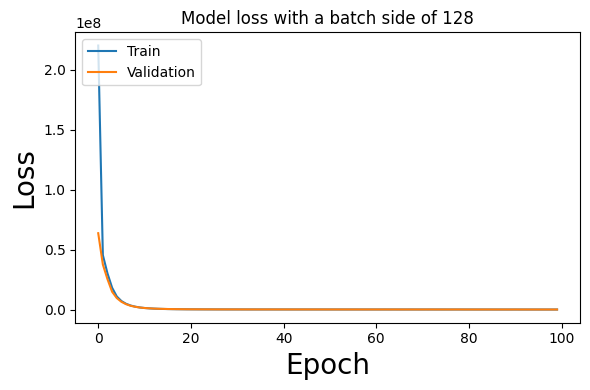

In [53]:
#plot the loss
fig14, ax14 = plt.subplots(figsize =(6,4))
ax14.plot(training_loss)
ax14.plot(val_loss)
ax14.set_xlabel('Epoch', fontsize =20)
ax14.set_ylabel('Loss', fontsize =20)
ax14.set_title('Model Loss')
ax14.legend(['Train', 'Validation'], loc='upper left')
ax14.set_title("Model loss with a batch side of 128")
plt.tight_layout()
plt.show()

### F. 
Use the k-Means clustering algorithm to identify clusters in the car sales data.
Consider different combinations of the numerical variables in the dataset to use as
input features for the clustering algorithm. In each case, what is the optimal number
of clusters (k) to use and why? Which combination of variables produces the best
clustering results? Use appropriate evaluation metrics to support your conclusions

To uncover meaningful groupings within the car sales data, we'll iteratively apply k-Means clustering to different combinations of numerical variables, meticulously determining the optimal number of clusters (k) for each configuration.

##### Using Engine size and Mileage

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import itertools

# Extract numerical features for clustering
numerical_features = ['Engine size', 'Mileage']
x = car_df[numerical_features]

# Preprocess: Scale numerical features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Experiment with different combinations of features and k values
best_score = -1
best_k = 0
best_features = []

for i in range(1, len(numerical_features) + 1):
    # Generate combinations of i numerical features
    feature_combinations = itertools.combinations(numerical_features, i)
    
    for features in feature_combinations:
        # Fit k-Means with different k values
        for k in range(2, 8):  # Test k values from 2 to 7
            kmeans = KMeans(n_clusters=k, n_init =10, random_state=42)
            clusters = kmeans.fit_predict(x_scaled[:, [x.columns.get_loc(f) for f in features]])
            
            # Evaluate clustering using silhouette score
            silhouette = silhouette_score(x_scaled[:, [x.columns.get_loc(f) for f in features]], clusters)
            
            # Track the best combination of features and k value
            if silhouette > best_score:
                best_score = silhouette
                best_k = k
                best_features = features

# Print the best combination of features and k value
print(f"Best combination of features: {best_features}")
print(f"Optimal number of clusters (k): {best_k}")
print(f"Best silhouette score: {best_score:.3f}")

Best combination of features: ('Engine size',)
Optimal number of clusters (k): 2
Best silhouette score: 0.764


#### Using Mileage and Year of Manufature

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import itertools

# Extract numerical features for clustering
numerical_features = ['Year of manufacture', 'Mileage']
x = car_df[numerical_features]

# Preprocess: Scale numerical features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Experiment with different combinations of features and k values
best_score = -1
best_k = 0
best_features = []

for i in range(1, len(numerical_features) + 1):
    # Generate combinations of i numerical features
    feature_combinations = itertools.combinations(numerical_features, i)
    
    for features in feature_combinations:
        # Fit k-Means with different k values
        for k in range(2, 8):  # Test k values from 2 to 7
            kmeans = KMeans(n_clusters=k, n_init =10, random_state=42)
            clusters = kmeans.fit_predict(x_scaled[:, [x.columns.get_loc(f) for f in features]])
            
            # Evaluate clustering using silhouette score
            silhouette = silhouette_score(x_scaled[:, [x.columns.get_loc(f) for f in features]], clusters)
            
            # Track the best combination of features and k value
            if silhouette > best_score:
                best_score = silhouette
                best_k = k
                best_features = features

# Print the best combination of features and k value
print(f"Best combination of features: {best_features}")
print(f"Optimal number of clusters (k): {best_k}")
print(f"Best silhouette score: {best_score:.3f}")

Best combination of features: ('Year of manufacture',)
Optimal number of clusters (k): 2
Best silhouette score: 0.619


##### Year of Manufacture and Engine size

In [56]:
# Extract numerical features for clustering
numerical_features = ['Year of manufacture', 'Engine size']
x = car_df[numerical_features]

# Preprocess: Scale numerical features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Experiment with different combinations of features and k values
best_score = -1
best_k = 0
best_features = []

for i in range(1, len(numerical_features) + 1):
    # Generate combinations of i numerical features
    feature_combinations = itertools.combinations(numerical_features, i)
    
    for features in feature_combinations:
        # Fit k-Means with different k values
        for k in range(2, 8):  # Test k values from 2 to 7
            kmeans = KMeans(n_clusters=k, n_init =10, random_state=42)
            clusters = kmeans.fit_predict(x_scaled[:, [x.columns.get_loc(f) for f in features]])
            
            # Evaluate clustering using silhouette score
            silhouette = silhouette_score(x_scaled[:, [x.columns.get_loc(f) for f in features]], clusters)
            
            # Track the best combination of features and k value
            if silhouette > best_score:
                best_score = silhouette
                best_k = k
                best_features = features

# Print the best combination of features and k value
print(f"Best combination of features: {best_features}")
print(f"Optimal number of clusters (k): {best_k}")
print(f"Best silhouette score: {best_score:.3f}")

Best combination of features: ('Engine size',)
Optimal number of clusters (k): 2
Best silhouette score: 0.764


##### combining the three features

In [57]:
# Extract numerical features for clustering
numerical_features = ['Year of manufacture', 'Engine size', 'Mileage']
x = car_df[numerical_features]

# Preprocess: Scale numerical features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Experiment with different combinations of features and k values
best_score = -1
best_k = 0
best_features = []

for i in range(1, len(numerical_features) + 1):
    # Generate combinations of i numerical features
    feature_combinations = itertools.combinations(numerical_features, i)
    
    for features in feature_combinations:
        # Fit k-Means with different k values
        for k in range(2, 8):  # Test k values from 2 to 7
            kmeans = KMeans(n_clusters=k, n_init =10, random_state=42)
            clusters = kmeans.fit_predict(x_scaled[:, [x.columns.get_loc(f) for f in features]])
            
            # Evaluate clustering using silhouette score
            silhouette = silhouette_score(x_scaled[:, [x.columns.get_loc(f) for f in features]], clusters)
            
            # Track the best combination of features and k value
            if silhouette > best_score:
                best_score = silhouette
                best_k = k
                best_features = features

# Print the best combination of features and k value
print(f"Best combination of features: {best_features}")
print(f"Optimal number of clusters (k): {best_k}")
print(f"Best silhouette score: {best_score:.3f}")

Best combination of features: ('Engine size',)
Optimal number of clusters (k): 2
Best silhouette score: 0.764


#### Using Agglomerative Clustering to identify clusters in the car sales data.

In [58]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define numerical features and load data
numerical_features = ['Engine size', 'Mileage']
x = car_df[numerical_features]

# Preprocess: Scale numerical features
scaler = StandardScaler() 
x_scaled = scaler.fit_transform(car_df[numerical_features]) 

# Perform Agglomerative Clustering
# let's set n_clusters to 5
n_clusters = 5 

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agg_clustering.fit_predict(x_scaled) 

# Add the cluster labels to the original dataframe
car_df['Cluster'] = clusters 

# Print the clusters or perform further analysis
print(car_df['Cluster'].value_counts())  # Display count of samples in each cluster
print(car_df.head())  # Display the dataframe with the assigned clusters

0    16350
4    11705
1    10557
3     7519
2     3869
Name: Cluster, dtype: int64
  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  Cluster  
0   127300   3074        0  
1    57850  49704        2  
2    39190  24072        0  
3   210814   1705        3  
4   127869   4101        0  


In [59]:
# Define numerical features and load data

numerical_features = ['Year of manufacture', 'Mileage']
x = car_df[numerical_features]

# Preprocess: Scale numerical features
scaler = StandardScaler() 
x_scaled = scaler.fit_transform(car_df[numerical_features]) 

# Perform Agglomerative Clustering
# let's set n_clusters to 5
n_clusters = 5 

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agg_clustering.fit_predict(x_scaled) 

# Add the cluster labels to the original dataframe
car_df['Cluster'] = clusters 

# Print the clusters or perform further analysis
print(car_df['Cluster'].value_counts())  # Display count of samples in each cluster
print(car_df.head())  # Display the dataframe with the assigned clusters

0    17011
2    15624
1     8491
3     5148
4     3726
Name: Cluster, dtype: int64
  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  Cluster  
0   127300   3074        0  
1    57850  49704        2  
2    39190  24072        2  
3   210814   1705        1  
4   127869   4101        0  


In [60]:
# Define numerical features and load data

numerical_features = ['Year of manufacture', 'Engine size']
x = car_df[numerical_features]

# Preprocess: Scale numerical features
scaler = StandardScaler() 
x_scaled = scaler.fit_transform(car_df[numerical_features]) 

# Perform Agglomerative Clustering
# let's set n_clusters to 5
n_clusters = 5 

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agg_clustering.fit_predict(x_scaled) 

# Add the cluster labels to the original dataframe
car_df['Cluster'] = clusters 

# Print the clusters or perform further analysis
print(car_df['Cluster'].value_counts())  # Display count of samples in each cluster
print(car_df.head())  # Display the dataframe with the assigned clusters

0    18553
1    13834
3    10262
4     4121
2     3230
Name: Cluster, dtype: int64
  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  Cluster  
0   127300   3074        0  
1    57850  49704        2  
2    39190  24072        1  
3   210814   1705        0  
4   127869   4101        1  


In [61]:
# Define numerical features and load data

numerical_features = ['Year of manufacture', 'Engine size', 'Mileage']
x = car_df[numerical_features]

# Preprocess: Scale numerical features
scaler = StandardScaler() 
x_scaled = scaler.fit_transform(car_df[numerical_features]) 

# Perform Agglomerative Clustering
# let's set n_clusters to 5
n_clusters = 5 

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agg_clustering.fit_predict(x_scaled) 

# Add the cluster labels to the original dataframe
car_df['Cluster'] = clusters 

# Print the clusters or perform further analysis
print(car_df['Cluster'].value_counts())  # Display count of samples in each cluster
print(car_df.head())  # Display the dataframe with the assigned clusters

4    14313
2    14015
1    11149
3     6573
0     3950
Name: Cluster, dtype: int64
  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  Cluster  
0   127300   3074        4  
1    57850  49704        0  
2    39190  24072        2  
3   210814   1705        3  
4   127869   4101        4  


In [96]:
import os
#a function to save the images
def save_image(fig, filename):
    if not os.path.exists("Data Viz"):
        os.makedirs("Data Viz")
    images_path = os.path.join("Data Viz", filename)
    fig.savefig(images_path)
 
# Save the images to the images folder
save_image(fig1, "Scatter Plot of Mileage against Price'.png")
save_image(fig2, "Scatter Plot of Manufacture against Price.png")
save_image(fig3, "Scatter Plot of Engine size against Price.png")
save_image(fig4, "Scatterplot of Price against Year of manufacture with Regression Line.png")
save_image(fig5, "Scatterplot of Price against Engine with Regression Line.png")
save_image(fig6, "Scatterplot of Price against Mileage with Regression Line.png")
save_image(fig7, "Scatterplot of Price against Mileage with Polynomial Regression.png")
save_image(fig8, "Scatterplot of Price against Year of manufacture with Polynomial Regression.png")
save_image(fig9, "Scatterplot of Price against Engine size with Polynomial Regression.png")
save_image(fig10, "Actual Prices vs Predicted Prices.png")
save_image(fig11, "Random Forest Regressor with all features.png")
save_image(fig12, "Model loss with a batch side of 32.png")
save_image(fig13, "Model loss with a batch side of 64.png")
save_image(fig14, "Model loss with a batch side of 128.png")